In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import pandas as pd
from collections import Counter
import numpy as np

In [16]:
data=pd.read_csv('dataset_2020.csv')
data

,Unnamed: 0,Unnamed: 0.1,index,count,borrow_station,return_station
0,0,0,"('610', '631')",747.0,610,631
1,1,1,"('610', '610')",439.0,610,610
2,2,2,"('610', '622')",218.0,610,622
3,3,3,"('610', '657')",206.0,610,657
4,4,4,"('610', '583')",202.0,610,583
...,...,...,...,...,...,...
975858,975905,975905,"('9992', '153')",1.0,9992,153
975859,975906,975906,"('9992', '151')",1.0,9992,151
975860,975907,975907,"('9992', '1171')",1.0,9992,1171
975861,975908,975908,"('9992', '102')",1.0,9992,102


In [17]:
df20 = data.copy()[['borrow_station','return_station','count']]
df20

,borrow_station,return_station,count
0,610,631,747.0
1,610,610,439.0
2,610,622,218.0
3,610,657,206.0
4,610,583,202.0
...,...,...,...
975858,9992,153,1.0
975859,9992,151,1.0
975860,9992,1171,1.0
975861,9992,102,1.0


In [18]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975863 entries, 0 to 975862
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   borrow_station  975863 non-null  int64  
 1   return_station  975863 non-null  int64  
 2   count           975863 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 22.3 MB


In [19]:
G20 = nx.from_pandas_edgelist(df20,  source='borrow_station', target='return_station', edge_attr='count')

In [6]:
print(nx.info(G20))

Name: 
Type: Graph
Number of nodes: 2157
Number of edges: 478461
Average degree: 443.6356


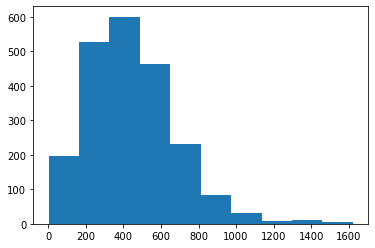

In [7]:
import matplotlib.pyplot as plt
degree20 = nx.degree(G20)

plt.figure()
plt.hist(dict(degree20).values())
plt.show()

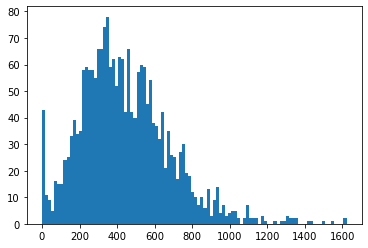

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
h = plt.hist(dict(degree20).values(), 100)

## 연결중심성

In [20]:
deg20 = nx.degree_centrality(G20)

In [10]:
deg20_df=pd.DataFrame(deg20.items(),columns=['station','degree_centrality'])
deg20_df = deg20_df.sort_values(by='degree_centrality' ,ascending=False)
deg20_df

,station,degree_centrality
131,2219,0.752319
630,207,0.749072
59,565,0.721707
80,825,0.696197
24,502,0.668831
...,...,...
2150,3001,0.000464
2144,1769,0.000464
2120,1476,0.000464
2122,13,0.000464


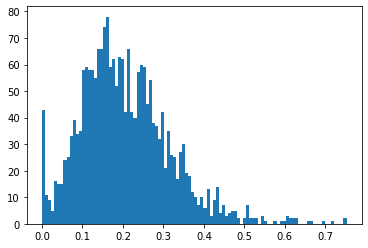

In [11]:
%matplotlib inline
h = plt.hist(dict(deg20).values(), 100)

## Pagerank

In [12]:
pr20 = nx.pagerank(G20, alpha=0.9)

In [13]:
pr20_df=pd.DataFrame(pr20.items(),columns=['station','pagerank'])
pr20_df= pr20_df.sort_values(by='pagerank' ,ascending=False)
pr20_df

,station,pagerank
131,2219,0.001590
630,207,0.001586
59,565,0.001519
80,825,0.001459
24,502,0.001421
...,...,...
2122,13,0.000048
2141,2640,0.000047
2150,3001,0.000047
2144,1769,0.000047


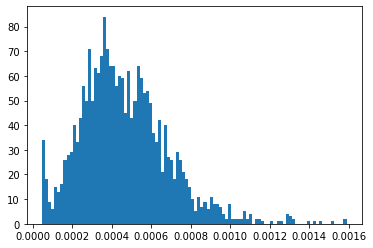

In [14]:
%matplotlib inline
h = plt.hist(dict(pr20).values(), 100)

## 노드 편향성 파악 지표

In [15]:
brw_stn = {}
rtn_stn = {}

In [16]:
for i in range(df20.shape[0]):

    try:
        rtn = int(df20['return_station'][i])
    except ValueError:
        continue
    brw = int(df20['borrow_station'][i])
    
    cnt = int(df20['count'][i])

    if brw_stn.get(brw) is None:
        brw_stn[brw] = cnt
    else:
        brw_stn[brw] += cnt
    
    if rtn_stn.get(rtn) is None:
        rtn_stn[rtn] = (cnt)
    else:
        rtn_stn[rtn] += cnt
    
    if (i % 10000  == 0):
        print(i,'per',df20.shape[0],'is done')
    

0 per 975863 is done
10000 per 975863 is done
20000 per 975863 is done
30000 per 975863 is done
40000 per 975863 is done
50000 per 975863 is done
60000 per 975863 is done
70000 per 975863 is done
80000 per 975863 is done
90000 per 975863 is done
100000 per 975863 is done
110000 per 975863 is done
120000 per 975863 is done
130000 per 975863 is done
140000 per 975863 is done
150000 per 975863 is done
160000 per 975863 is done
170000 per 975863 is done
180000 per 975863 is done
190000 per 975863 is done
200000 per 975863 is done
210000 per 975863 is done
220000 per 975863 is done
230000 per 975863 is done
240000 per 975863 is done
250000 per 975863 is done
260000 per 975863 is done
270000 per 975863 is done
280000 per 975863 is done
290000 per 975863 is done
300000 per 975863 is done
310000 per 975863 is done
320000 per 975863 is done
330000 per 975863 is done
340000 per 975863 is done
350000 per 975863 is done
360000 per 975863 is done
370000 per 975863 is done
380000 per 975863 is done


In [17]:
len(brw_stn.keys())

2152

In [18]:
T = {}
for key in brw_stn.keys():
    brw_count = brw_stn[key]
    rtn_count = 0
    if rtn_stn.get(key) is not None:
        rtn_count = rtn_stn[key]
    T[key] = (rtn_count - brw_count) / (rtn_count + brw_count)
        

In [19]:
rtn_stn

{631: 19519,
 610: 6792,
 622: 12164,
 657: 10737,
 583: 51928,
 660: 11391,
 630: 14898,
 609: 16325,
 617: 10604,
 624: 13226,
 646: 31130,
 625: 15910,
 604: 7785,
 602: 33846,
 642: 8542,
 633: 15448,
 525: 24057,
 1328: 21488,
 579: 10735,
 311: 16191,
 537: 13146,
 627: 16466,
 648: 20590,
 658: 9986,
 502: 121725,
 1308: 44576,
 605: 9209,
 668: 9717,
 3557: 1596,
 538: 7170,
 634: 22647,
 3413: 6143,
 654: 4549,
 641: 18187,
 669: 4228,
 558: 11593,
 621: 2522,
 623: 9828,
 612: 14713,
 368: 8951,
 508: 11535,
 3519: 17319,
 678: 4897,
 526: 8744,
 679: 1649,
 3511: 39783,
 521: 15353,
 435: 2980,
 635: 13572,
 550: 9858,
 3560: 5064,
 677: 6624,
 378: 12029,
 518: 7673,
 3553: 1478,
 608: 2180,
 1321: 20064,
 581: 7947,
 626: 11682,
 565: 51615,
 574: 12543,
 3514: 16708,
 1414: 21916,
 606: 9392,
 586: 6660,
 3508: 15246,
 536: 9180,
 329: 12048,
 557: 8737,
 663: 16792,
 568: 25320,
 601: 6590,
 562: 8744,
 614: 14181,
 387: 7314,
 559: 18149,
 507: 11066,
 513: 21669,
 553:

In [20]:
brw_stn

{610: 6898,
 1707: 9307,
 2312: 4035,
 2724: 5917,
 1436: 5242,
 740: 8923,
 1690: 9954,
 225: 13094,
 2067: 8671,
 1044: 30665,
 1150: 26319,
 1303: 8926,
 2279: 9851,
 3517: 15031,
 1308: 40418,
 1210: 51250,
 2621: 32691,
 1706: 8978,
 1411: 7960,
 1993: 5163,
 1458: 14566,
 2170: 8882,
 1214: 9516,
 258: 11478,
 1148: 8461,
 3586: 5390,
 1135: 11370,
 1390: 5495,
 1368: 9524,
 2119: 10144,
 2032: 13936,
 1336: 15656,
 2136: 19871,
 1539: 12079,
 551: 21179,
 1611: 25540,
 1006: 5736,
 402: 8934,
 1451: 20189,
 1625: 31911,
 1302: 7582,
 2202: 9310,
 401: 7917,
 1337: 23082,
 505: 27504,
 1515: 6640,
 1538: 4559,
 1029: 16601,
 906: 25391,
 256: 8824,
 1986: 18494,
 1994: 7560,
 237: 12114,
 2171: 11777,
 1354: 15898,
 765: 32501,
 2639: 7849,
 251: 9301,
 1167: 22692,
 984: 4019,
 613: 14496,
 2729: 4765,
 1172: 12536,
 1545: 2024,
 2404: 6450,
 2601: 16958,
 2721: 8797,
 375: 10358,
 1535: 17638,
 1924: 4824,
 1224: 12401,
 1667: 11975,
 2179: 9866,
 129: 6872,
 567: 23328,
 635: 

In [21]:
rtn20=pd.DataFrame(rtn_stn.items(),columns=['station','N_in'])
brw20=pd.DataFrame(brw_stn.items(),columns=['station','N_out'])

In [22]:
deg20_df.to_csv('degree20.csv')
pr20_df.to_csv('pagerank20.csv')
rtn20.to_csv('rtn20.csv')
brw20.to_csv('brw20.csv')

# 네트워크 추가분석

In [11]:
nx.density(G20)

0.2057679058473813

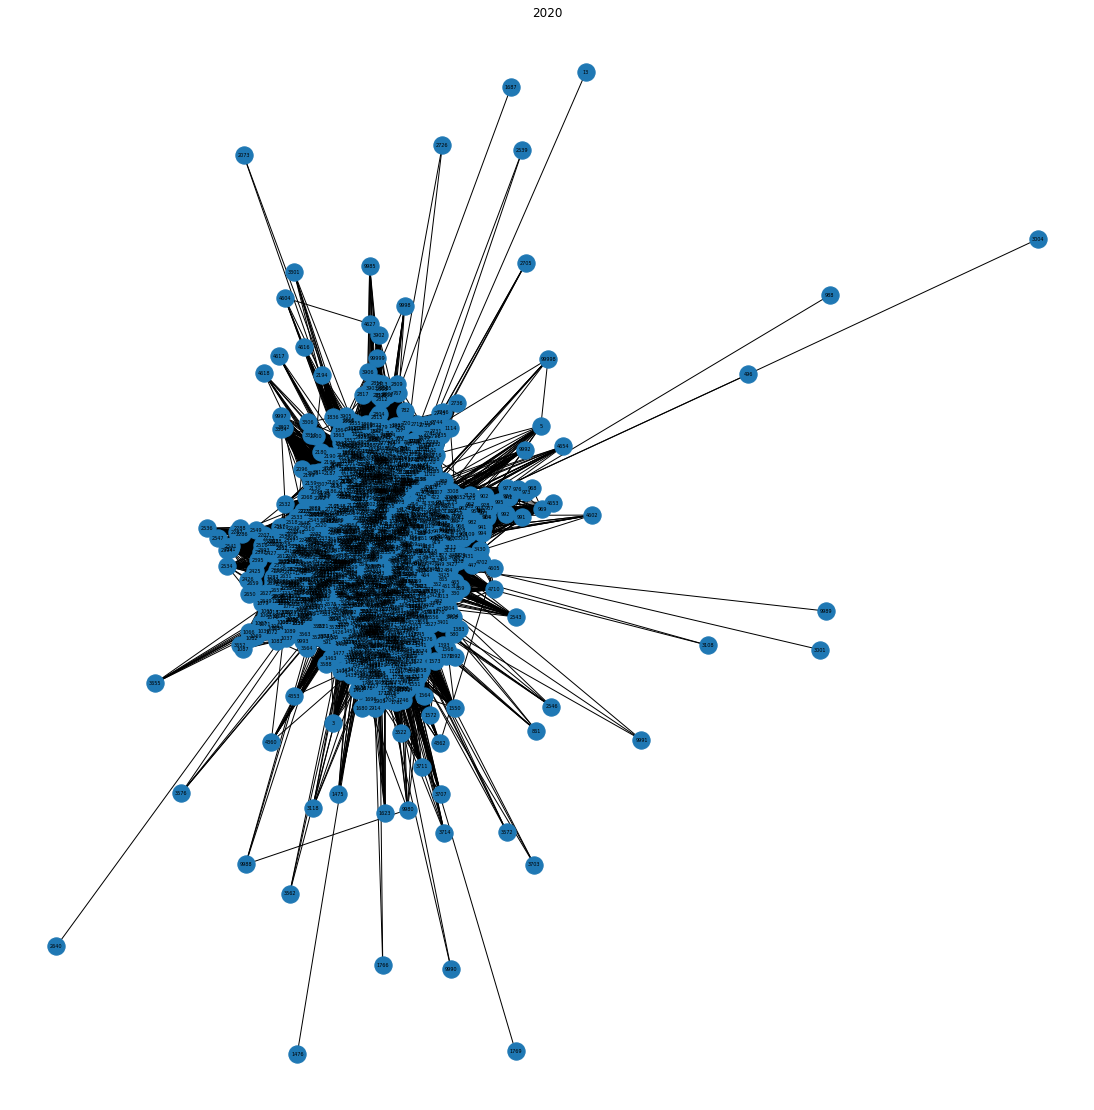

In [28]:
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G20)
nx.draw(G20, pos, with_labels=True, font_size = 5)
edge_weight = nx.get_edge_attributes(G20, 'weight')
nx.draw_networkx_edge_labels(G20, pos, edge_labels = edge_weight)
#nx.draw_networkx_edge_labels(G20, pos, edge_labels = edge_weight, node_size=[5 + v[1]*5 for v in deg20], with_labels=True)
plt.title("2020")
plt.show()

In [21]:
nx.clustering(G20)

{610: 0.5794597920924814,
 631: 0.4722410430140643,
 622: 0.533145359649649,
 657: 0.5670200018434879,
 583: 0.306700477368308,
 660: 0.5029087968818029,
 630: 0.5462705655258141,
 609: 0.47518549337771304,
 617: 0.5466695856822287,
 624: 0.5448449912529755,
 646: 0.4255294040845841,
 625: 0.48904024270186647,
 604: 0.6020621722301681,
 602: 0.4483895969184688,
 642: 0.5438078261607673,
 633: 0.4573063635135396,
 525: 0.37712728727127287,
 1328: 0.47052285841100755,
 579: 0.4929542043899141,
 311: 0.4035965098957225,
 537: 0.4307450211536477,
 627: 0.49592483063822645,
 648: 0.49403720715619037,
 658: 0.565047385928576,
 502: 0.29803586595629683,
 1308: 0.4163004069552349,
 605: 0.5395394189681378,
 668: 0.5348030604299788,
 3557: 0.6053095395461555,
 538: 0.5208550626310087,
 634: 0.46709332827660316,
 3413: 0.6436850820412464,
 654: 0.6463116464905481,
 641: 0.41583938936880116,
 669: 0.5936252372537469,
 558: 0.4774854407426403,
 621: 0.6873156342182891,
 623: 0.5155366066107367,
 6

In [24]:
nx.average_clustering(G20)

0.599452226011074

In [25]:
import community as community_louvain
import matplotlib.cm as cm

partition=community_louvain.best_partition(G20)


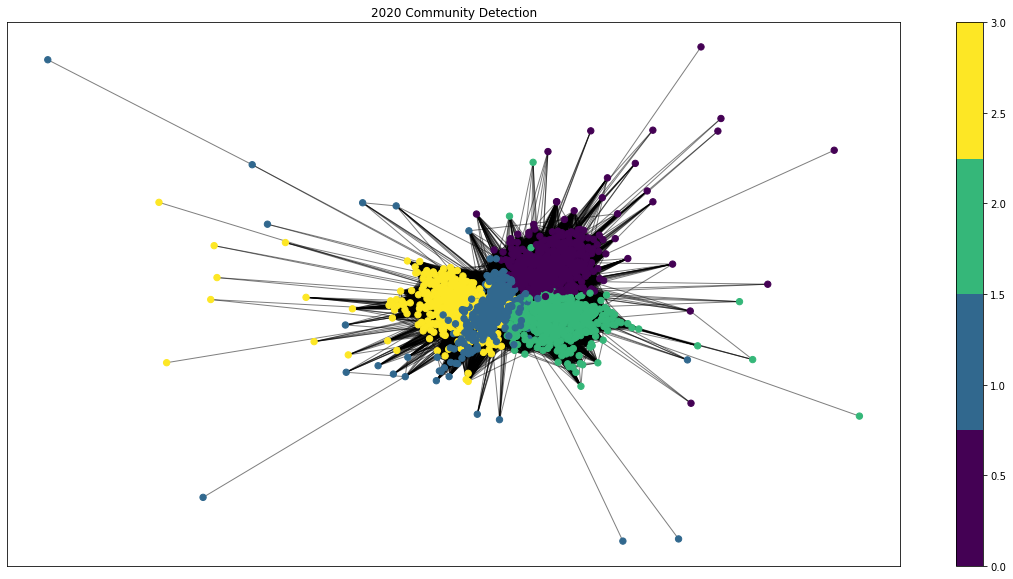

In [27]:
plt.figure(figsize=(20,10))
pos=nx.spring_layout(G20)
cmap=cm.get_cmap('viridis', max(partition.values())+1)
im=nx.draw_networkx_nodes(G20, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G20, pos, alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.colorbar(im)
plt.title('2020 Community Detection')
plt.show(block=False)